In [1]:
# This code is the demo of solving classification problem using pycaret package
# It includes typical data analysis processes like loading data, data visualization, data cleaning, PCA, train and evaluate models etc
# It uses weibo-user beharvior dataset as an example
# Modifications are necessary regarding the actual project
cd /Users/sujiaoyang/Desktop/ayxc

/Users/sujiaoyang/Desktop/ayxc


Top 10 rows of the dataset:
      SinaUid  t_WC   t_WPS  t_Sixltr  t_Dic  t_Numerals  t_funct  t_pronoun  \
0  1778254203    44   44.00      0.00  70.45        2.27    38.64       0.00   
1  1977736655   216  216.00      4.17  53.24        0.00    32.41       5.56   
2  1656784373    32   32.00      3.12  15.62        0.00     6.25       3.12   
3  1745387305   939  939.00      4.05  55.48        0.85    36.63       8.41   
4  1400831155   526  526.00      1.90  57.41        0.95    27.38       2.66   
5  1914586941  1378  459.33      3.34  62.70        0.15    36.65       6.02   
6  1845467613   183  183.00      3.28  58.47        0.00    27.32       9.29   
7  1926259777   193  193.00      2.07  66.32        0.00    31.61       5.18   
8  1794011211    68   68.00      0.00  76.47        0.00    50.00       4.41   
9  1740798097   645  645.00      0.93  60.47        0.47    38.14       6.05   

   t_ppron   t_i  ...  PL  EM  PR  PG  AI  SS  PE  NE   OH  EW  
0     0.00  0.00  ...   8 

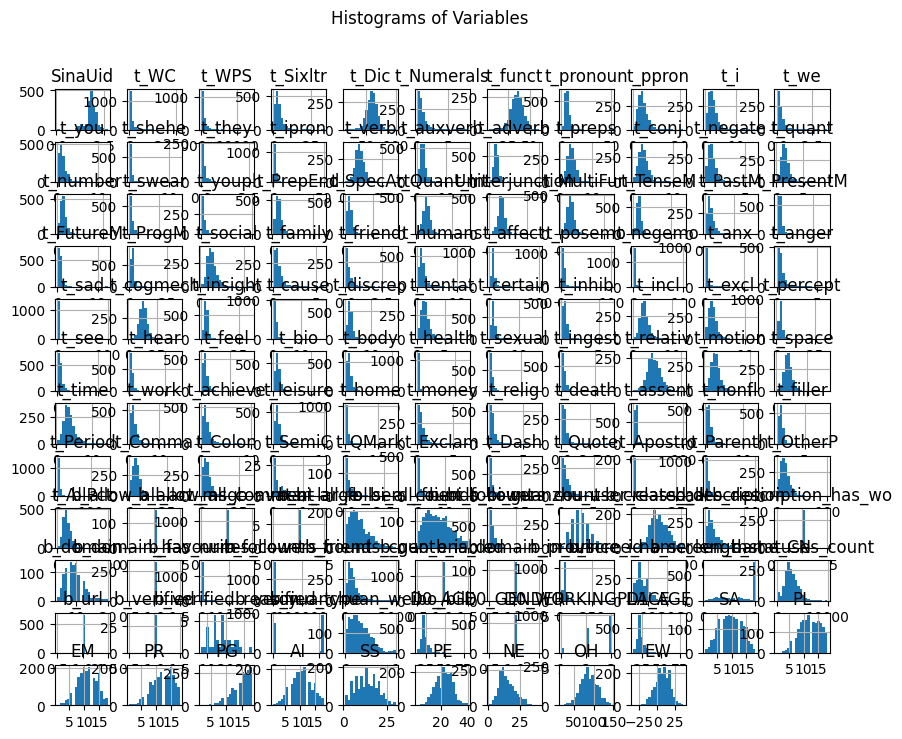

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel data
file_path = 'demo-behavior-psych.xls'
df = pd.read_excel(file_path)

# Display the top 10 rows
print("Top 10 rows of the dataset:")
print(df.head(10))

# Display information about variables
print("\nVariables in the dataset:")
print(df.columns)

# replace 0 with nan
df.replace(0, np.nan, inplace=True)

# Data Visualization
# Histogram
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Variables")
plt.show()

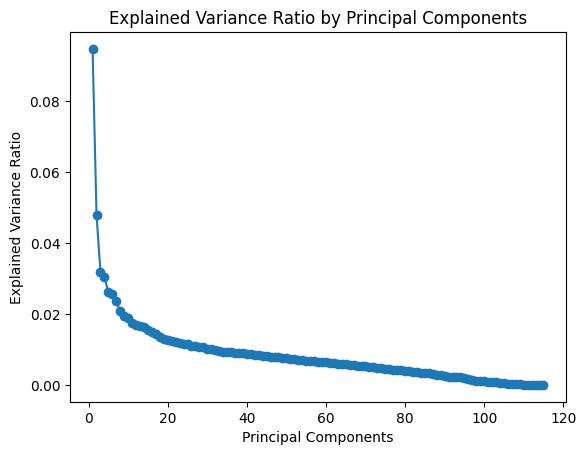

Number of components selected: 81
Explained Variance Ratio: [0.09462816 0.04785297 0.03173969 0.03026638 0.02614402 0.02547179
 0.02353314 0.02070951 0.01952946 0.01880723 0.01734575 0.01690919
 0.0165285  0.01622441 0.01556143 0.01486544 0.01424749 0.01342483
 0.01281466 0.01268683 0.01241503 0.01199725 0.01194249 0.01157353
 0.01142632 0.01101717 0.01090604 0.01073078 0.0106219  0.010256
 0.01007463 0.00980881 0.00953894 0.00940667 0.00934904 0.00921632
 0.00908931 0.00893893 0.0088798  0.00883248 0.00864449 0.00850505
 0.00839725 0.00827084 0.00808552 0.00793265 0.00790273 0.00772995
 0.00760058 0.00757122 0.00732503 0.00717272 0.00715445 0.00694078
 0.00685528 0.00670586 0.00664949 0.00655132 0.00647881 0.00637898
 0.00622048 0.0060724  0.00595822 0.00591691 0.00582361 0.00561233
 0.00556281 0.00544139 0.00531299 0.00523479 0.0050868  0.00493582
 0.00477383 0.00465998 0.00444777 0.00436329 0.00427673 0.00421999
 0.00410009 0.00396336 0.00387274]
Cumulative Explained Variance Ratio:

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' contains only numeric variables (you may need to preprocess categorical variables)

# Drop any rows with missing values
df.dropna(inplace=True)


# List of target variable columns to drop
target_columns_to_drop = ['SA','PL', 'EM', 'PR', 'PG', 'AI', 'SS', 'PE', 'NE', 'OH', 'EW',
                          'D0_AGE', 'D0_GENDER','D0_WORKINGPLACE','D1_AGE','D1_GENDER',	'D1_RACE','D1_Nationality',
                          'D1_Education','D1_Edu_Father','D1_Edu_Mother', 'D1_Marriage','D1_HasChildren','D1_Job',
                          'D1_IsOnlyChild','D1_GrowUpAt','D1_WorkingCountry','D1_LivingPlace','D1_LivingHowLong',
                          'D1_FamilyIncome','D1_EverPsychConsult','D1_HealthStatus','D1_ChronicDisease','D1_GeneticDisease',
                          'D1_LivingStatus','D1_Religion','D1_ParentReligion','D1_Support']

# Drop the target variables
df.drop(columns=target_columns_to_drop, inplace=True)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_std)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
# For example, select the number of components that explain a certain percentage of variance
# In this example, let's say we want to keep 95% of the variance
cumulative_variance = explained_variance_ratio.cumsum()
num_components = len(cumulative_variance[cumulative_variance < 0.95]) + 1

# Retrain PCA with the selected number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_std)

# Display the results or use the principal components for further analysis
print(f"Number of components selected: {num_components}")
print("Explained Variance Ratio:", explained_variance_ratio[:num_components])
print("Cumulative Explained Variance Ratio:", cumulative_variance[:num_components])


In [17]:
import pandas as pd
import numpy as np

# Load the data from 'demo-behavior-psych.xls'
df = pd.read_excel('demo-behavior-psych.xls')

# Check data types
print(df.dtypes)

# Convert to numeric types (assuming all columns should be numeric)
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values
df = df.dropna()

# Extract numerical values from the DataFrame
matrix = df.values

# Perform SVD
U, S, VT = np.linalg.svd(matrix, full_matrices=False)

# U, S, VT are matrices such that df.values = U * S * VT
# U: Left singular vectors
# S: Singular values
# VT: Transpose of the right singular vectors

# Let's print some information about the results
print("Shape of U matrix:", U.shape)
print("Shape of S matrix (singular values):", S.shape)
print("Shape of VT matrix:", VT.shape)

SinaUid       int64
t_WC          int64
t_WPS       float64
t_Sixltr    float64
t_Dic       float64
             ...   
SS            int64
PE            int64
NE            int64
OH            int64
EW            int64
Length: 153, dtype: object
Shape of U matrix: (0, 0)
Shape of S matrix (singular values): (0,)
Shape of VT matrix: (0, 153)


,Description,Value
0,Session id,123
1,Target,PR
2,Target type,Multiclass
3,Original data shape,"(1773, 153)"
4,Transformed data shape,"(1773, 210)"
5,Transformed train set shape,"(1241, 210)"
6,Transformed test set shape,"(532, 210)"
7,Ordinal features,13
8,Numeric features,129
9,Categorical features,23


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.1628,0.0000,0.1628,0.1579,0.1505,0.0808,0.0818,0.0810
gbc,Gradient Boosting Classifier,0.1604,0.0000,0.1604,0.1602,0.1551,0.0834,0.0839,7.3440
rf,Random Forest Classifier,0.1603,0.0000,0.1603,0.1527,0.1445,0.0780,0.0792,0.1150
lightgbm,Light Gradient Boosting Machine,0.1539,0.0000,0.1539,0.1494,0.1462,0.0756,0.0760,4.4380
ada,Ada Boost Classifier,0.1475,0.0000,0.1475,0.0507,0.0642,0.0510,0.0653,0.1140
lda,Linear Discriminant Analysis,0.1394,0.0000,0.1394,0.1448,0.1370,0.0630,0.0633,0.0360
dt,Decision Tree Classifier,0.1257,0.0000,0.1257,0.1252,0.1232,0.0506,0.0509,0.0480
ridge,Ridge Classifier,0.1184,0.0000,0.1184,0.1045,0.1079,0.0341,0.0344,0.0310
lr,Logistic Regression,0.1152,0.0000,0.1152,0.0133,0.0238,0.0000,0.0000,0.2430
dummy,Dummy Classifier,0.1152,0.0000,0.1152,0.0133,0.0238,0.0000,0.0000,0.0320


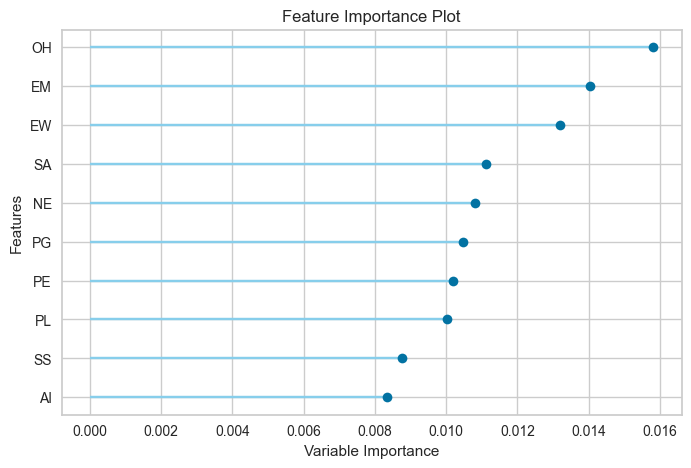

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SinaUid', 't_WC', 't_WPS',
                                              't_Sixltr', 't_Dic', 't_Numerals',
                                              't_funct', 't_pronoun', 't_ppron',
                                              't_i', 't_we', 't_you', 't_shehe',
                                              't_they', 't_ipron', 't_verb',
                                              't_auxverb', 't_adverb', 't_preps',
                                              't_conj', 't_negate', 't_quant',
                                              't_number', 't_swear', 't_youpl',
                                              '...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                     

In [13]:
from pycaret.classification import *
# Assuming 'df' is your DataFrame 
# 'setup' function will initialize the PyCaret environment and perform preprocessing
file_path = 'demo-behavior-psych.xls'
df = pd.read_excel(file_path)
clf = setup(data=df, target='PR', 
            session_id=123, log_experiment=True, experiment_name='classification_experiment')

# Compare different models and choose the best one
best_model = compare_models()

# Feature importance analysis
plot_model(best_model, plot='feature')

# Train the best model on the entire dataset
final_model = finalize_model(best_model)

# Evaluate model performance on the test set
evaluate_model(final_model)

# Save the model
save_model(final_model, 'classification_model')

# Close the PyCaret environment
#close_outcome = close()

In [31]:
# compare neural networks from pycaret with the one in tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from pycaret.classification import *
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data from 'demo-behavior-psych.xls'
df = pd.read_excel('demo-behavior-psych.xls')

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Convert non-numeric variables to numeric using label encoding
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Assuming 'SA' is your target variable
target_column = 'SA'

# Set up your PyCaret environment
clf_setup = setup(data=df, target=target_column)

# Compare and evaluate multiple neural network models with PyCaret
best_nn_pycaret = compare_models(include=['mlp'], fold=5, turbo=True)


# === Using TensorFlow ===

# Extract features and target from the dataset
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network with the architecture selected by PyCaret
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_nn_tensorflow = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the accuracy
accuracy_nn_tensorflow = accuracy_score(y_test, y_pred_nn_tensorflow)
print(f"Accuracy (TensorFlow): {accuracy_nn_tensorflow:.4f}")

# Evaluate the PyCaret model on the test set
y_pred_nn_pycaret = predict_model(best_nn_pycaret, data=pd.DataFrame(X_test, columns=X_train.columns))

# Evaluate the accuracy
accuracy_nn_pycaret = accuracy_score(y_test, y_pred_nn_pycaret['PR'])
print(f"Accuracy (PyCaret): {accuracy_nn_pycaret:.4f}")


,Description,Value
0,Session id,2365
1,Target,SA
2,Target type,Multiclass
3,Original data shape,"(1773, 153)"
4,Transformed data shape,"(1773, 153)"
5,Transformed train set shape,"(1241, 153)"
6,Transformed test set shape,"(532, 153)"
7,Numeric features,152
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
mlp,MLP Classifier,0.0862,0.4000,0.0862,0.0074,0.0137,0.0000,0.0000,0.2740


Epoch 1/10
36/36 [==============================] - 0s 2ms/step - loss: -3279109120.0000 - accuracy: 0.0097 - val_loss: -7943169024.0000 - val_accuracy: 0.0141
Epoch 2/10
36/36 [==============================] - 0s 739us/step - loss: -16115749888.0000 - accuracy: 0.0106 - val_loss: -29085349888.0000 - val_accuracy: 0.0141
Epoch 3/10
36/36 [==============================] - 0s 733us/step - loss: -52542377984.0000 - accuracy: 0.0106 - val_loss: -85753937920.0000 - val_accuracy: 0.0141
Epoch 4/10
36/36 [==============================] - 0s 712us/step - loss: -138175643648.0000 - accuracy: 0.0106 - val_loss: -205648658432.0000 - val_accuracy: 0.0141
Epoch 5/10
36/36 [==============================] - 0s 731us/step - loss: -301412941824.0000 - accuracy: 0.0106 - val_loss: -419198369792.0000 - val_accuracy: 0.0141
Epoch 6/10
36/36 [==============================] - 0s 713us/step - loss: -573131325440.0000 - accuracy: 0.0106 - val_loss: -753591975936.0000 - val_accuracy: 0.0141
Epoch 7/10
36/

Accuracy (PyCaret): 0.1155


In [33]:
# change model parameters in pycaret
# use random forest as an example
from pycaret.classification import *

# Assuming 'data' is your dataset and 'target_column' is the target variable
clf_setup = setup(data=df, target='SA')

# Create a model
model = create_model('rf')  # RandomForestClassifier as an example

# Define a custom grid for hyperparameter tuning
custom_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Tune the model with the custom grid
tuned_model = tune_model(model, custom_grid=custom_grid)

# Evaluate the tuned model
evaluate_model(tuned_model)


,Description,Value
0,Session id,7684
1,Target,SA
2,Target type,Multiclass
3,Original data shape,"(1773, 153)"
4,Transformed data shape,"(1773, 153)"
5,Transformed train set shape,"(1241, 153)"
6,Transformed test set shape,"(532, 153)"
7,Numeric features,152
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0960,0.6276,0.0960,0.0938,0.0895,0.0221,0.0223
1,0.0806,0.0000,0.0806,0.0608,0.0685,0.0031,0.0031
2,0.1048,0.0000,0.1048,0.0866,0.0916,0.0323,0.0327
3,0.1452,0.0000,0.1452,0.1231,0.1302,0.0713,0.0718
4,0.1532,0.0000,0.1532,0.1320,0.1385,0.0802,0.0809
5,0.1129,0.0000,0.1129,0.1007,0.1020,0.0369,0.0373
6,0.0806,0.0000,0.0806,0.0860,0.0761,0.0023,0.0023
7,0.1371,0.6980,0.1371,0.1152,0.1225,0.0654,0.0658
8,0.1371,0.6779,0.1371,0.1213,0.1244,0.0641,0.0648


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1680,0.6489,0.1680,0.1444,0.1526,0.0973,0.0981
1,0.1371,0.0000,0.1371,0.1127,0.1203,0.0640,0.0645
2,0.1290,0.0000,0.1290,0.1080,0.1143,0.0560,0.0565
3,0.1048,0.0000,0.1048,0.0840,0.0902,0.0278,0.0281
4,0.1371,0.0000,0.1371,0.1105,0.1160,0.0634,0.0642
5,0.1613,0.0000,0.1613,0.1510,0.1508,0.0890,0.0900
6,0.1210,0.0000,0.1210,0.0938,0.1030,0.0476,0.0479
7,0.1613,0.6952,0.1613,0.1465,0.1396,0.0900,0.0911
8,0.1613,0.7031,0.1613,0.1447,0.1502,0.0911,0.0917


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…